### Проект - Рынок заведений общественного питания Москвы.


**[Шаг №1. Загружаем данные и подготовим их к анализу](#1.)**

1.1.    [Загружаем открытые данные о заведениях общественного питания Москвы.](#1.1.)   
1.2.    [Изучаем правильность типов данных в каждой колонке, убеждаемся в отсутствие пропущенных значений и дубликатов. Если будет необходимо, то обрабатываем их.](#1.2.)

**[Шаг №2. Анализ данных](#2.)**  

2.1.	[Исследуем соотношение видов объектов общественного питания по количеству, строим график.](2.1.)  
2.2.	[Исследуем соотношение сетевых и несетевых заведений, строим график.](#2.2.)  
2.3.    [Выясним для какого вида объекта общественного питания характерно сетевое распространение?](#2.3.)  
2.4.    [Определим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#2.4.)  
2.5.    [Для каждого вида объекта общественного питания опишем среднее количество посадочных мест.](#2.5.)  
2.6.	[Выделим в отдельный столбец информацию об улице из столбца address.](#2.6.)    
2.7.	[Построим график топ-10 улиц по количеству объектов общественного питания.](#2.7.)  
2.8.	[Найдем число улиц с одним объектом общественного питания и ответим на вопрос — в каких районах Москвы находятся эти улицы?](#2.8.)  
2.9.	[Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания и выявим закономерности?](#2.9.)    
2.10.   [Делаем общий вывод и формулируем рекомендации о виде заведения, количестве посадочных мест, а также районе расположения.](#2.10.)


**[Шаг №3. Подготовка презентации.](#3.)**

Готовим презентацию исследования для инвесторов. Для создания презентации используем PowerPoint, а финальную версию презентации готовим в формате pdf. 

<a id="1."></a>
### Шаг №1. Загружаем данные и готовим их к анализу.

Общими усилиями партнеров были получены данные из открытых источников таких, как Портал открытых данных Правительства Москвы https://data.mos.ru/, Edatam.ru и др. В итоге был получен датасет, с которым и будем работать дальше.


In [2]:
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 120)
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, time
import scipy.stats as stats
import plotly.express as px 
from plotly import graph_objects as go

***1.1. Загружаем данные***

In [5]:
#rest_data = pd.read_csv('rest_data.csv')
#rest_data.info()
#rest_data.head()

In [3]:
from io import BytesIO
import requests

spreadsheet_id = '1GzymBqpPFaqo6tIqO894jZ-YNwym0Vvd0Ghu5glkGgA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
rest_data  = pd.read_csv(BytesIO(r.content))
rest_data.info()
rest_data.head()

#https://docs.google.com/spreadsheets/d/1GzymBqpPFaqo6tIqO894jZ-YNwym0Vvd0Ghu5glkGgA/edit?usp=sharing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<a id="1.2."></a>
***1.2. Изучаем правильность типов данных.***

Пропусков в датафрейме нет, а вот дупликатов достаточно много, хотя на первый взгляд кажется, что  это не так. 

In [7]:
rest_data.duplicated().sum()

0

Сначала приведем все названия заведений к верхнему регистру.

In [8]:
rest_data['object_name'] = rest_data['object_name'].astype(str)

In [9]:
rest_data['object_name'] = rest_data['object_name'].str.upper()
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,РОДНИК,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,КАФЕ «АКАДЕМИЯ»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,КАФЕ «ВИШНЕВАЯ МЕТЕЛЬ»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,БРУСНИКА,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,БУФЕТ МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,СТОЛОВАЯ МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


Затем найдем дупликаты по столбцам *object_name* и *address* и удалим их.

In [10]:
rest_data = rest_data.drop_duplicates(subset=["object_name", "address"])
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15141 entries, 0 to 15364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15141 non-null  int64 
 1   object_name  15141 non-null  object
 2   chain        15141 non-null  object
 3   object_type  15141 non-null  object
 4   address      15141 non-null  object
 5   number       15141 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 828.0+ KB


Попробуем еще найти и удалить дупликаты путем замены символа "-" на пробел. 

In [11]:
rest_data['object_name'] = rest_data['object_name'].str.replace('-',' ')
rest_data = rest_data.drop_duplicates(subset=["object_name", "address"])#.count()
rest_data.head(10)
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15140 entries, 0 to 15364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15140 non-null  int64 
 1   object_name  15140 non-null  object
 2   chain        15140 non-null  object
 3   object_type  15140 non-null  object
 4   address      15140 non-null  object
 5   number       15140 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 828.0+ KB


<div style="border:solid green 1px; padding: 10px">
<font color='green'>Дупликаты все еще остались, например: Krispy Creme/Krispy Kreme, Maison Declair/Maison declaiz, Иль Патио/IL Patio/Иль-патио/IL Патио и др. Оставим пока все как есть и будем считать, что такого рода шум не сильно скажется на результатах анализа.</font>

<a id="2."></a>
### Шаг №2. Анализ данных.

<a id="2.1."></a>
***2.1. Cоотношение видов объектов общественного питания по количеству.***

Найдем количество объектов питания каждого типа.

In [12]:
object_rest_data = rest_data['object_type'].value_counts()
print(object_rest_data)

кафе                                 5990
столовая                             2572
ресторан                             2271
предприятие быстрого обслуживания    1885
бар                                   849
буфет                                 565
кафетерий                             392
закусочная                            344
магазин (отдел кулинарии)             272
Name: object_type, dtype: int64


Строим круговую диаграмму, чтобы наглядно увидеть доли объектов каждого типа из их общего числа.

In [1]:
#colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
#fig = go.Figure(data=[go.Pie(labels=rest_data['object_type'].unique(), marker=dict(colors=colors), values=rest_data['object_type'].value_counts())])
#fig.update_layout(title = 'Соотношение объектов общепита в Москве')
#fig.show() 

<div style="border:solid green 1px; padding: 10px">
<font color='green'>Доля кафе явно доминирует в структуре московского общепита, что объясняется гибким форматом заведений данного типа. К ним относятся объекты как с бюджетным, так и с дорогим меню, национальные кухни, тематические и сезонные кафе и т.д.  
За ними следуют столовые, поскольку в это число традиционно входят объекты общепита в учебных заведениях, на предприятиях, в медицинских и госучреждениях, социальные столовые и т.д. Характерной особенностью столовых, наряду с их широкой распространенностью является ограниченный доступ для сторонних клиентов.  
Третье место занимают закусочные, которые по сути аналогичны по функциональности кафе с самообслуживанием, но с ограниченным количеством готовых блюд или меню быстрого приготовления. Как правило, закусочные ориентируются на бюджетных посетителей.  
Заметную долю также занимают предприятия быстрого обслуживания, к которым относятся сетевые заведения, точки с уличной едой или стрит-фуд и др. Как правило такие заведения торгуют едой на вынос и не предоставляют места для посетителей.</font>

<a id="2.2."></a>
***2.2. Cоотношение сетевых и несетевых заведений.***

Выясним, как соотносятся сетевые и не сетевые точки общепита. Соберем новый датафреймю

In [14]:
chain_rest_data = rest_data.groupby('chain', as_index=False).agg({'id': 'count'})

Найдем соотношение заведений по типу.

In [15]:
chain_rest_data['share'] = chain_rest_data['id'] / chain_rest_data['id'].sum()
chain_rest_data

,chain,id,share
0,да,2936,0.193923
1,нет,12204,0.806077


Построим столбчатую диаграмму.

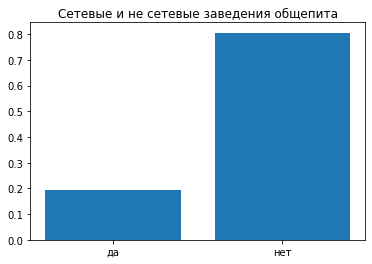

In [16]:
plt.bar(chain_rest_data['chain'], chain_rest_data['share'])
plt.title('Сетевые и не сетевые заведения общепита')
plt.show()

Не взирая на глобализацию, которая не могла не коснуться индустрии еды, доля сетевых заведений в Москве относительно невелика. И, не смотря на практически неизменные меню, главным достоинством таких заведений является быстрое получение заказа и предсказуемое качество еды.

<a id="2.3."></a>
***2.3. Структура сетевого общепита.***

Найдем распределение сетевых предприятий питания.

In [17]:
chain_object = rest_data.query('chain == "да"').groupby('object_type', as_index=False).agg(
    {'id': 'count'}).sort_values('id', ascending = False)
chain_object.columns = ('object_type', 'chainid')
chain_object

,object_type,chainid
3,кафе,1381
6,предприятие быстрого обслуживания,782
7,ресторан,539
5,магазин (отдел кулинарии),78
2,закусочная,56
4,кафетерий,51
0,бар,37
1,буфет,9
8,столовая,3


<div style="border:solid green 1px; padding: 10px">
<font color='green'>В структуре сетевого общепита кафе также занимают первое место с большим отрывом. Тройку лидеров замыкают предприятия быстро обслуживания и рестораны, хотя, в используемых для проекта данных, эти понятия сильно размыты. Например, KFC, McDonald's, Букргер Кинг встречаются во всех трех категориях, поэтому будем воспринимать полученный результат, как данность - текущий тренд московского общепита.</font>

Сравним распределение заведений по типу в несетовом сегменте.

In [18]:
rest_data.query('chain == "нет"').groupby('object_type').agg({'id': 'count'}).sort_values('id', ascending = False)

,id
object_type,
кафе,4609
столовая,2569
ресторан,1732
предприятие быстрого обслуживания,1103
бар,812
буфет,556
кафетерий,341
закусочная,288
магазин (отдел кулинарии),194


Порядок типов заведений изменился, тем не менее продожим исследование.
Найдем общее количество заведений пр типу.

In [19]:
object_rest_data = rest_data.groupby('object_type', as_index=False).agg({'id': 'count'}).sort_values('id', ascending = False)

Объединим два датасета.

In [20]:
chain_proportion = chain_object.merge(object_rest_data, on='object_type')
chain_proportion

,object_type,chainid,id
0,кафе,1381,5990
1,предприятие быстрого обслуживания,782,1885
2,ресторан,539,2271
3,магазин (отдел кулинарии),78,272
4,закусочная,56,344
5,кафетерий,51,392
6,бар,37,849
7,буфет,9,565
8,столовая,3,2572


Найдем относительную долю типа сетевых предприятий от общего числа по их типу. 

In [21]:
chain_proportion['proportion'] = chain_proportion['chainid'] / chain_proportion['id']
chain_proportion = chain_proportion.sort_values('proportion', ascending = False)
chain_proportion

,object_type,chainid,id,proportion
1,предприятие быстрого обслуживания,782,1885,0.414854
3,магазин (отдел кулинарии),78,272,0.286765
2,ресторан,539,2271,0.237340
0,кафе,1381,5990,0.230551
4,закусочная,56,344,0.162791
5,кафетерий,51,392,0.130102
6,бар,37,849,0.043581
7,буфет,9,565,0.015929
8,столовая,3,2572,0.001166


Построим график для визуализации распределения.

In [22]:
fig = px.bar(chain_proportion, x='object_type', y='proportion', title='Доля сетевых заведений по их типу', color_discrete_sequence=["indianred"])
fig.update_xaxes(tickangle=45)
fig.show() 

<div style="border:solid green 1px; padding: 10px">
<font color='green'> Вполне ожидаемо видим, что чуть больше 40% предприятий быстрого питания являются сетевыми. Для ресторанов и кафе эта доля составила около 25%. а вот буфеты и столовые в подавляющем большинстве существуют сами по себе.</font>

<a id="2.4."></a>
***2.4. Посадочные места для посетителей в сетевом общепите.***

Ответим на вопросы:  
Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? Построим гистограммы и попробуем разобраться с этим вопросом.

Text(0.5, 1.0, 'Рис.1. Распределение посадочных мест по заведениям')

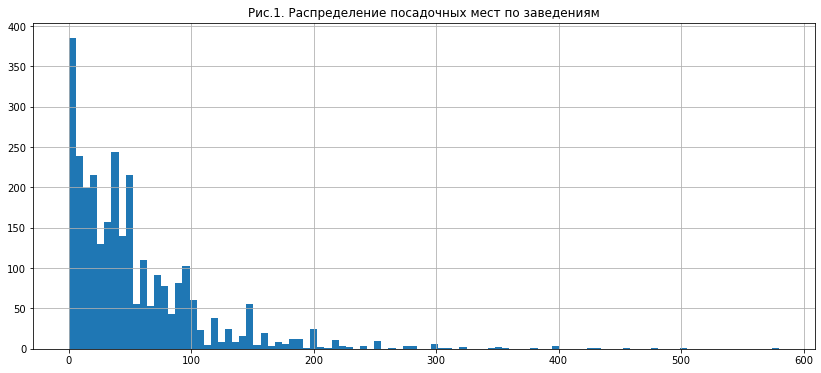

In [23]:
rest_data[rest_data['chain'] == 'да']['number'].hist(bins=100, figsize=(14, 6))
plt.title('Рис.1. Распределение посадочных мест по заведениям')

Получилась малоинформативная картина, распределение числа мест лишь отдаленно напоминает нормальное. Наблюдаются многочисленные выбросы, природа которых не ясна. В первом приближении можно сказать, что заметна тенденция для большей части сетевых заведений иметь небольшое количества посадочных мест. При нулевых значениях посадочных это практически стритфуд. 
Отсечем длинный "хвост" заведений с большим числом посадочных мест.

Text(0.5, 1.0, 'Рис.2. Распределение посадочных мест по заведениям')

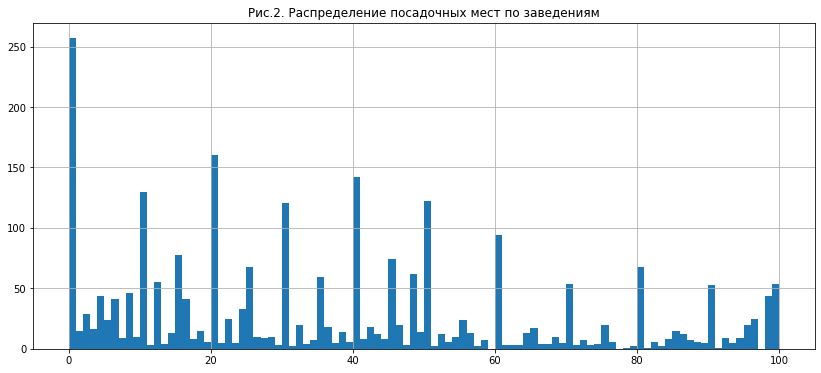

In [24]:
rest_data[rest_data['chain'] == 'да']['number'].hist(bins=100, range=(0, 100), figsize=(14, 6))
plt.title('Рис.2. Распределение посадочных мест по заведениям')

Картина стала детальнее, хотя, ясности по-прежнему нет. Наблюдаются многочисленные выбросы кратные 5 и 10. В большей части случаев это объясняется тем, что объекты компактно расположены на фудкортах в  офисно-торгово-развлекательных центрах и посадочные места на фудкортах создают и предоставляют владельцы центров. Вероятно, в зависимости от политики арендодателя в одних центрах точки общепита имеют какое-то условное число посадочных мест (кратное 5 или 10), а в других центрах такого деления нет и там точки питания не могут даже условно указать "свое" число посадочных мест. И тогда возникают нули. 
Попробуем избавиться от выбросов кратным 5 и 10, и построим еще одну гистограмму. Какой-то особой магией обладают цифры 98 и 100, от них мы тоже временно избавимся.

Text(0.5, 1.0, 'Рис.3. Распределение посадочных мест по заведениям')

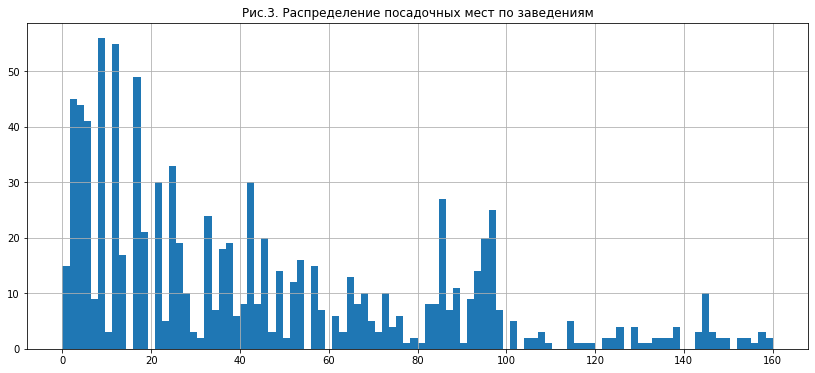

In [25]:
rest_data_2 = rest_data[rest_data['chain'] == 'да']['number'].reset_index(drop=False)
ten_list = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 48, 50, 55, 60, 65, 70, 75, 80, 90, 98, 100, 110, 120, 130, 140, 150, 160]
rest_data_2[np.logical_not(rest_data_2['number']
                           .isin(ten_list))]['number'].hist(bins=100, range=(0, 160), figsize=(14, 6))
plt.title('Рис.3. Распределение посадочных мест по заведениям')

Наконец-то, наблюдается хоть какой-то тренд. Больше всего заведений имеет до 30 посадочных мест, затем с ростом посадоных мест заметно снижается число таких заведений. Но затем наблюдаются плотная группа заведений с числом мест от 80 до 100.   

Для окончательной ясности перейдем к построению точечных диаграмм .

Text(0.5, 0, 'Точки общепита, шт.')

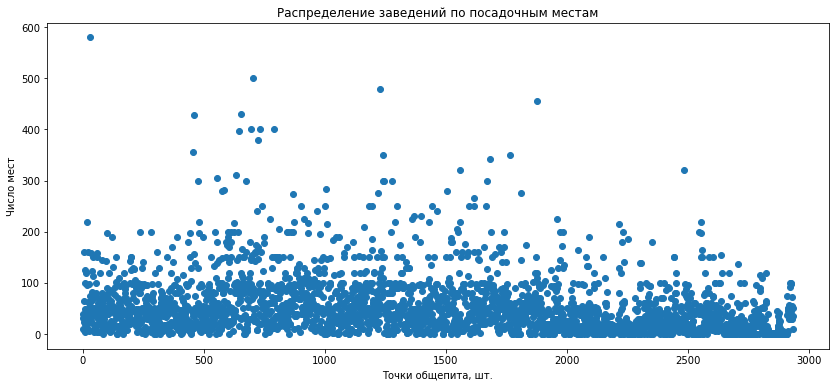

In [26]:
scatter_rest_data= rest_data.query('chain == "да"')#.groupby('number', as_index=False).agg({'id': 'count'})#.sort_values('number', ascending = False)
x_values = pd.Series(range(0, len(scatter_rest_data['number'])))

plt.figure(figsize=(14, 6))
plt.title('Распределение заведений по посадочным местам')
plt.scatter(x_values, scatter_rest_data['number'])
plt.ylabel("Число мест")
plt.xlabel("Точки общепита, шт.")

И из этого графика пока не возможно что-то понять. Избавимся от части аномальных значений.

Text(0.5, 0, 'Точки общепита, шт.')

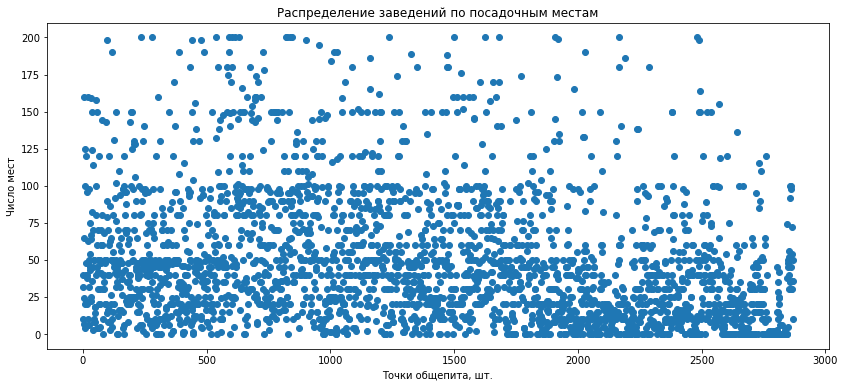

In [27]:
scatter_rest_data= rest_data.query('chain == "да"')#.groupby('number', as_index=False).agg({'id': 'count'})#.sort_values('number', ascending = False)
x_values = pd.Series(range(0, len(scatter_rest_data[scatter_rest_data['number']<= 200]['number'])))

plt.figure(figsize=(14, 6))
plt.title('Распределение заведений по посадочным местам')
plt.scatter(x_values, scatter_rest_data[scatter_rest_data['number']<= 200]['number'])
plt.ylabel("Число мест")
plt.xlabel("Точки общепита, шт.")

Снова наблюдаем те же выбросы, но уже виде групп точек расположенных горизонтально.  

Попробуем избавиться от них проверенным способом и построим еще раз те же точечные диаграммы.

Text(0.5, 0, 'Точки сетевого общепита')

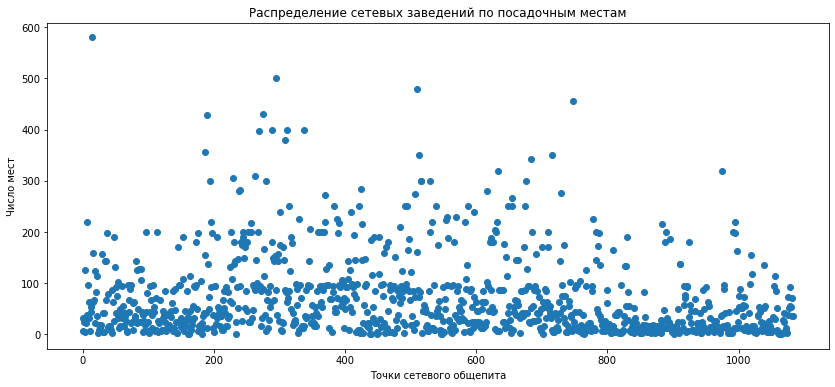

In [28]:
ten_list = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 48, 50, 55, 60, 65, 70, 75, 80, 90, 98, 100, 110, 120, 130, 140, 150, 160]
x_values = pd.Series(range(0, len(rest_data_2.query('number != @ten_list'))))

plt.figure(figsize=(14, 6))
plt.title('Распределение сетевых заведений по посадочным местам')
plt.scatter(x_values, rest_data_2.query('number != @ten_list')['number'])
plt.ylabel("Число мест")
plt.xlabel("Точки сетевого общепита")

Text(0.5, 0, 'Точки общепита')

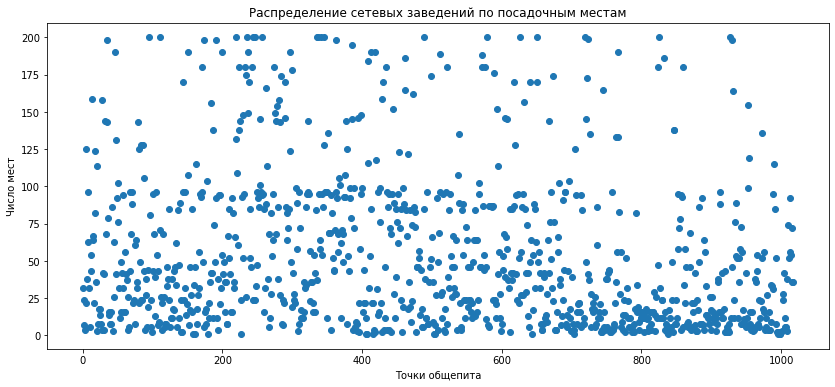

In [29]:
x_values = pd.Series(range(0, len(rest_data_2.query('number != @ten_list').query('number <= 200'))))

plt.figure(figsize=(14, 6))
plt.title('Распределение сетевых заведений по посадочным местам')
plt.scatter(x_values, rest_data_2.query('number != @ten_list').query('number <= 200')['number'])
plt.ylabel("Число мест")
plt.xlabel("Точки общепита")

Самые плотные скопления значений наблюдаем ниже 50 посадочных мест. 

Оценим границы и выбросы с помощью перцентилей.

In [30]:
np.percentile(rest_data_2['number'], [90, 95, 99])

array([120.  , 159.25, 275.65])

Возьмем десятку самых крупных сетевых заведений общепита и сравним в них среднее количество посадочных мест.

In [31]:
rest_data[rest_data['chain'] == 'да'].groupby('object_name', as_index=False).agg(
    {'id':'count', 'number':'median'}).sort_values(by='id', ascending=False).head(10)

,object_name,id,number
559,ШОКОЛАДНИЦА,154,50.0
25,KFC,152,45.0
329,МАКДОНАЛДС,147,79.0
110,БУРГЕР КИНГ,136,45.0
518,ТЕРЕМОК,93,24.0
160,ДОМИНО'С ПИЦЦА,90,16.0
310,КРОШКА КАРТОШКА,89,15.0
502,СУШИ WOK,72,6.0
338,МИЛТИ,72,0.0
366,ПАПА ДЖОНС,51,20.0


In [32]:
fig = px.bar(rest_data[rest_data['chain'] == 'да'].groupby('object_name', as_index=False).agg(
    {'id':'count', 'number':'median'}).sort_values(by='id', ascending=False).head(10).sort_values(by='number', ascending=False),
             x='object_name', y='number', title='Среднее кол-во посадочных мест в первой десятке сетевых объектов', color_discrete_sequence=["darkgrey"])
fig.update_xaxes(tickangle=45)
fig.show() 

<div style="border:solid green 1px; padding: 10px">
<font color='green'>Можно сделать вывод о том, что крупнейшие операторы быстрого питания не склонны создавать точки своего присутствия с большим числом посадочных мест. Они явно предпочитают развивать сети за счет большого числа точек общепита с относительно небольшим - до 50, количеством мест. Несколько выбивается из этого правила Макдональдс, но эта компания самой первой начала свою операционную деятельность в Москве и сумела использовать это преимущество, арендуя наиболее  выгодные по местоположению и интересные помещения.</font> 

<a id="2.5."></a>
***2.5. Опишем среднее количество посадочных мест для каждого вида объекта общественного питания опишите и построим графики.***

Для начала попробуем найти средние значения для объектов питания.

In [33]:
rest_data.groupby('object_type').agg({'number': 'mean'})

,number
object_type,
бар,43.660777
буфет,51.660177
закусочная,6.904070
кафе,39.907679
кафетерий,9.155612
магазин (отдел кулинарии),5.610294
предприятие быстрого обслуживания,20.743767
ресторан,97.128137
столовая,130.457621


В целом, картина близка к реальной, но мы помним, что в распределении мест имеется длинный хвост значений, поэтому далее найдем также медианные значения.

In [34]:
rest_data.groupby('object_type', as_index=False).agg({'number': 'median'})

,object_type,number
0,бар,35
1,буфет,32
2,закусочная,0
3,кафе,32
4,кафетерий,6
5,магазин (отдел кулинарии),0
6,предприятие быстрого обслуживания,6
7,ресторан,80
8,столовая,103


Расчет медиан выглядит более убедительно. Построим график среднего распределения посадочных мест по заведениям. 

In [35]:
#!pip install plotly
import plotly.express as px 

In [36]:
fig = px.bar(rest_data.groupby('object_type', as_index=False).agg({'number': 'median'}),
             x='object_type', y='number', title='Среднее кол-во посадочных мест по объектам')
fig.update_xaxes(tickangle=45)
fig.show() 

<div style="border:solid green 1px; padding: 10px">
<font color='green'> В целом картина выглядит обоснованной. Столовые - предприятия самообслуживания должны предоставить много посадочных мест в обеденное время, как правило это ведомственные объекты и большая часть из них вечером не работает. Еда в ресторане - скорее церемония, чем процесс, поэтому посетители должны в полной мере насладиться всеми составляющими этого действия. Спешить им особо некуда, поэтому и мест должно быть много.  
Число посадочных мест в предприятиях быстрого обслуживания для вполного списка несколько отличается от от числа мест для сетевых  предприятия быстрого обслуживания, полученных выше. Это объясняется тем что в полном списке много предприятий стрифуда, у которых действительно нет посадочных мест либо есть пара-другая высоких столиков для перекуса стоя. </font>

In [37]:
rest_data[rest_data['chain'] == 'да'].groupby('object_type').agg(
    {'number':'median'}).sort_values(by='number', ascending=False).head(10)

,number
object_type,
столовая,120.0
ресторан,90.0
бар,45.0
кафе,40.0
предприятие быстрого обслуживания,25.0
закусочная,8.0
кафетерий,8.0
магазин (отдел кулинарии),3.5
буфет,0.0


<a id="2.6."></a>
***2.6. Выделим в отдельный столбец информацию об улице из столбца address.***

In [38]:
import re

In [39]:
rest_data['street'] = rest_data['address'].str.extract('(([А-я0-9ё\s\-]+)?(\
улица|переулок|шоссе|проспект|площадь|проезд|село|Проезд|аллея|бульвар|набережная|тупик|линия|\
Зеленоград)([А-я0-9ё\s\-]+)?)')[0]
rest_data.head(10)
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15140 entries, 0 to 15364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15140 non-null  int64 
 1   object_name  15140 non-null  object
 2   chain        15140 non-null  object
 3   object_type  15140 non-null  object
 4   address      15140 non-null  object
 5   number       15140 non-null  int64 
 6   street       14884 non-null  object
dtypes: int64(2), object(5)
memory usage: 946.2+ KB


In [40]:
rest_data['street'].unique()

array([' улица Егора Абакумова', ' улица Талалихина',
       ' Абельмановская улица', ..., ' улица Василисы Кожиной',
       ' улица Дмитрия Рябинкина', ' улица Евгения Родионова'],
      dtype=object)

Удалим пробелы перед названием улиц.

In [41]:
rest_data['street'] = rest_data['street'].str.strip()
rest_data['street'].unique()

array(['улица Егора Абакумова', 'улица Талалихина',
       'Абельмановская улица', ..., 'улица Василисы Кожиной',
       'улица Дмитрия Рябинкина', 'улица Евгения Родионова'], dtype=object)

Добавим в датасет столбец с номерами домов.

In [42]:
rest_data['house'] = rest_data['address'].str.extract('(([А-я0-9ё\s\-]+)?(дом|строение|корпус|владение)([А-я0-9ё\s\-]+)?)')[0]
rest_data['house'].unique()
rest_data.info()
rest_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15140 entries, 0 to 15364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15140 non-null  int64 
 1   object_name  15140 non-null  object
 2   chain        15140 non-null  object
 3   object_type  15140 non-null  object
 4   address      15140 non-null  object
 5   number       15140 non-null  int64 
 6   street       14884 non-null  object
 7   house        15140 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.0+ MB


,id,object_name,chain,object_type,address,number,street,house
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,дом 9
1,77874,РОДНИК,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,дом 2
2,24309,КАФЕ «АКАДЕМИЯ»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,дом 6
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,дом 1
4,119365,КАФЕ «ВИШНЕВАЯ МЕТЕЛЬ»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,дом 9
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240,Абрамцевская улица,дом 15
6,148815,БРУСНИКА,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек,дом 6
7,20957,БУФЕТ МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90,Авиамоторная улица,дом 8
8,20958,КПФ СЕМЬЯ 1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150,Авиамоторная улица,дом 8
9,28858,СТОЛОВАЯ МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120,Авиамоторная улица,дом 8


<a id="2.7."></a>
***2.7.Построим график топ-10 улиц по количеству объектов общественного питания и выясним в каких районах Москвы находятся эти улицы***

Найдем числом объектов общепита на каждой улице и выберем первую десятку.

In [43]:
street_rest_data = rest_data.groupby('street', as_index=False).agg(
    {'id': 'nunique'}).sort_values(by=['id'], ascending=False)
street_rest_data.head(10)

,street,id
1351,город Зеленоград,230
1396,проспект Мира,196
999,Профсоюзная улица,180
678,Ленинградский проспект,171
984,Пресненская набережная,165
395,Варшавское шоссе,163
681,Ленинский проспект,147
1393,проспект Вернадского,126
668,Кутузовский проспект,112
593,Каширское шоссе,110


Отразим полученные данные на графике.

In [44]:
fig = px.bar(street_rest_data.iloc[1:11],
             x='street', y='id', title='Топ-10 улиц по объектам общепита', color_discrete_sequence=["goldenrod"])
fig.update_xaxes(tickangle=45)
fig.show() 

Выясним, в каких районах находятся эти улицы. Для этого используем мосгазовский "Список всех улиц Москвы и их привязка к районам" с сайта **Хаб открытых данных**.(В процессе работы над проектом этот сайт внезапно перестал отвечать на запросы, но файл остался доступным для скачивания. Поэтому файл был выложен Google-таблицы.)

In [45]:
from io import BytesIO
import requests
spreadsheet_id = '1rWhYlJ2NopeRcUmEqkWuo1cLg5h3aqollmlY1pz940Y'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts  = pd.read_csv(BytesIO(r.content))
districts = districts[['streetname', 'areaid', 'okrug', 'area']]
districts.columns = ('street', 'areaid', 'okrug', 'area')
districts

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [46]:
#Запрос перестал работать.
#districts = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
#districts.columns = ('street', 'areaid', 'okrug', 'area')
#districts.head(1)

In [47]:
address_rest_data = street_rest_data.merge(districts, on='street', how='left')
address_rest_data
address_rest_data.groupby(['street', 'area']).agg({'id': 'first'}).sort_values(by='id', ascending=False)

id
street                   area                        
город Зеленоград         Панфиловский район       230
                         Район Крюково            230
                         Район Матушкино-Савелки  230
проспект Мира            Алексеевский район       196
                         Ярославский Район        196
...                                               ...
Лосевская улица          Ярославский Район          1
1-й Саратовский проезд   Район Текстильщики         1
1-й Рижский переулок     Алексеевский район         1
1-й Обыденский переулок  Район Хамовники            1
Красноказарменный проезд Район Лефортово            1

[2296 rows x 1 columns]

<div style="border:solid green 1px; padding: 10px">
<font color='green'>
Характерно, что большинство улиц являются вылетными магистралями и, проходя через несколько районов, собирают большое количество точек общепита. Ислючение составляет совсем короткая Пресненская набережная, на которой находится Москва-Сити со всеми вытекающими последствиями, да еще Кировоградская улица, к которой примыкают сразу несколько торгово-офисных центров.  
Что касается Зеленограда, то это отельная история. Данные по этому округу мы будем учитывать в исследовании, но в плане инвестиций район малоинтересен.</font> 

<a id="2.8."></a>
***2.8. Найдем число улиц с одним объектом общественного питания.***

Теперь посмотрим, сколько улиц в Москве обладают одним-единственным предприятием общепита.

In [48]:
rest_data.head(1)

,id,object_name,chain,object_type,address,number,street,house
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,дом 9


In [49]:
rest_data.groupby('street').agg({'id':'count'}).query('id == 1').count()

id    544
dtype: int64

In [50]:
once_rest_data = rest_data.groupby('street', as_index=False).agg({'id':'count'}).query('id == 1')
once_rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 2 to 1875
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  544 non-null    object
 1   id      544 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [51]:
once_rest_data.duplicated().sum()

0

Как видим, таких улиц не так уж и мало - целых 544. 

Выясним, в каких районах Москвы находятся эти улицы.

In [52]:
area_once_rest_data = once_rest_data.merge(districts, on='street')
area_once_rest_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 555
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  556 non-null    object
 1   id      556 non-null    int64 
 2   areaid  556 non-null    object
 3   okrug   556 non-null    object
 4   area    556 non-null    object
dtypes: int64(1), object(4)
memory usage: 26.1+ KB


In [53]:
area_once_rest_data.head(12)

,street,id,areaid,okrug,area
0,1-й Балтийский переулок,1,54,САО,Район Аэропорт
1,1-й Басманный переулок,1,13,ЦАО,Басманный район
2,1-й Басманный переулок,1,15,ЦАО,Красносельский район
3,1-й Ботанический проезд,1,82,СВАО,Район Свиблово
4,1-й Вешняковский проезд,1,120,ЮВАО,Рязанский район
5,1-й Голутвинский переулок,1,21,ЦАО,Район Якиманка
6,1-й Зачатьевский переулок,1,20,ЦАО,Район Хамовники
7,1-й Кирпичный переулок,1,36,ВАО,Район Соколиная Гора
8,1-й Кожевнический переулок,1,98,ЮАО,Даниловский район
9,1-й Кожуховский проезд,1,98,ЮАО,Даниловский район


Количество строк в новом датасете увеличилось из-за того, что некотороые улицы проходят через несколько районов, но их число невелико и вряд ли оно заметно скажется на общей картине. Поэтому проигнорируем это обстоятельство.  

Выясним далее, в каких районах больше всего таких улиц.

In [54]:
area_once_rest_data.groupby(['okrug','area'], as_index=False).agg(
    {'street': 'count'}).sort_values('street', ascending=False).head(10)

,okrug,area,street
70,ЦАО,Таганский район,27
62,ЦАО,Басманный район,26
68,ЦАО,Район Хамовники,26
65,ЦАО,Пресненский район,20
71,ЦАО,Тверской район,20
47,СВАО,Район Марьина роща,18
66,ЦАО,Район Арбат,18
64,ЦАО,Мещанский район,15
67,ЦАО,Район Замоскворечье,14
83,ЮВАО,Район Лефортово,12


Примечательно, что 8 из 10 топ-районов находятся в Центральном округе. Это объясняется тем, что в ЦАО много коротких улиц и, как правило, там не так много возможностей для аренды подходящего помещение под кафе или ресторан. А для офисно-торгово-развлекательных центров места нет вообще.

Ранжируем теперь округа по количеству улиц с одним объектом общепита.

In [55]:
area_once_rest_data.groupby(['okrug'], as_index=False).agg(
    {'street': 'count'}).sort_values('street', ascending=False)

,okrug,street
6,ЦАО,186
0,ВАО,67
4,СВАО,66
3,САО,55
8,ЮВАО,55
1,ЗАО,43
7,ЮАО,29
5,СЗАО,27
9,ЮЗАО,27
2,Зеленоград,1


In [56]:
fig = px.bar(area_once_rest_data.groupby(['okrug'], as_index=False).agg(
    {'street': 'count'}).sort_values('street', ascending=False),
             x='okrug', y='street', title='Количество улиц по округам с одним объектом общепита')#, color_discrete_sequence=["goldenrod"])
fig.update_xaxes(tickangle=45)
fig.show() 

<div style="border:solid green 1px; padding: 10px">
<font color='green'> И здесь ЦАО лидирует с большим отрывом. Впрочем, полученная информация особой ценностью не обладает. Понятно, что в любом городе предприятия общепита концентрируются в местах с наибольшей деловой активностью, то есть в центральной его части. При этом в центре находится большое количество локаций с исторической застройкой, поэтому в ЦАО много коротких улиц и, как правило, там не так много возможностей для аренды подходящего помещение под кафе или ресторан. А для офисно-торгово-развлекательных центров места просто не хватает, к тому же в центре ситуация с парковками просто трагическая.  
С другой стороны, в спальных районах спрос на услуги общепита традиционно невысок, поэтому там на достаточно длинной улице может вообще не быть ни одного заведения общественного питания. Зато в таких районах вся активность сосредоточена в торгово-развлекательных центрах возле станций метро или вылетных магистралей. Эту мысль подтверждают цифры из таблицы выше, у всех округов они в разы меньше, чем у центрального.</font>

<a id="2.9."></a>
***2.9. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.***

Посмотрим какие закономерности здесь можно выявить. Найдем среднее количество посадочных мест для улиц лидеров по числу заведений общепита.

In [57]:
rest_data.groupby(['street']).agg(
    {'id': 'count', 'number': 'mean'}).reset_index(drop=False).sort_values(
    'id', ascending=False).head(11)

,street,id,number
1351,город Зеленоград,230,73.608696
1396,проспект Мира,196,62.627551
999,Профсоюзная улица,180,48.038889
678,Ленинградский проспект,171,52.497076
984,Пресненская набережная,165,45.975758
395,Варшавское шоссе,163,52.687117
681,Ленинский проспект,147,62.979592
1393,проспект Вернадского,126,69.738095
668,Кутузовский проспект,112,86.580357
593,Каширское шоссе,110,55.954545


Исключим из расмотрения Зеленоград, как район малоинтересный для нашего исследования. Хотя он и является городским округом, но по сути это просто удаленный от Москвы микрорайн, к тому же с плохой транспортной доступностью. 

Все-таки средняя величина неподходящий метод для рядов с большим разбросом данных. Найдем медиану посадочных мест.

In [58]:
rest_data.groupby(['street']).agg(
    {'id': 'count', 'number': 'median'}).reset_index(drop=False).sort_values(
    'id', ascending=False).iloc[1:11]

,street,id,number
1396,проспект Мира,196,45.0
999,Профсоюзная улица,180,25.0
678,Ленинградский проспект,171,40.0
984,Пресненская набережная,165,30.0
395,Варшавское шоссе,163,30.0
681,Ленинский проспект,147,45.0
1393,проспект Вернадского,126,40.0
668,Кутузовский проспект,112,41.0
593,Каширское шоссе,110,25.0
599,Кировоградская улица,106,30.0


Построим точечную диаграмму для иллюстрации последнего датасета.

In [59]:
number_by_street = rest_data.groupby(['street']).agg(
    {'id': 'count', 'number': 'median'}).reset_index(drop=False).sort_values(
    'id', ascending=False)#.iloc[1:11]

Text(0, 0.5, 'Среднее число мест')

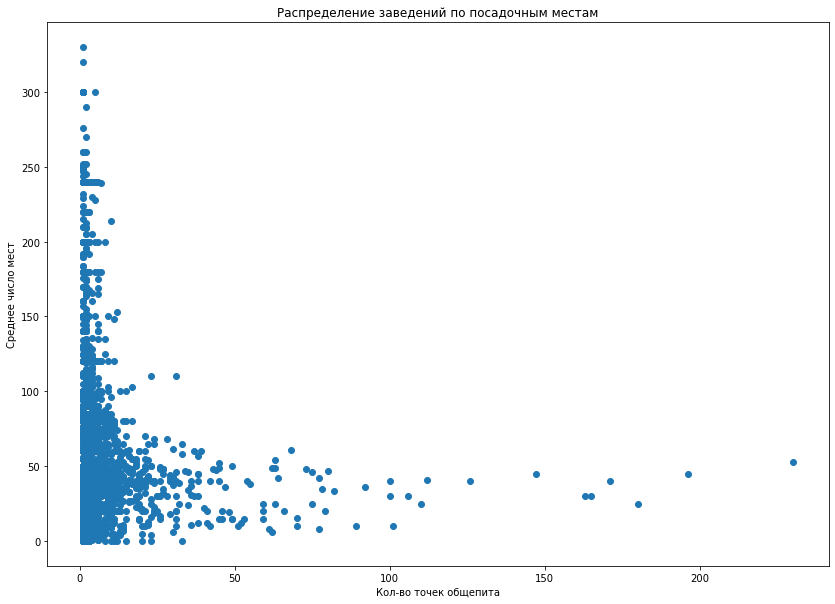

In [60]:
plt.figure(figsize=(14, 10))
plt.title('Распределение заведений по посадочным местам')
plt.scatter(number_by_street['id'], number_by_street['number'])
plt.xlabel("Кол-во точек общепита")
plt.ylabel("Среднее число мест")


Полученное распределение, в общем-то, подтверждает предыдущие наблюдения. Большая часть заведений имеет относительно небольшое число посадочных мест. В частности заведения на топ-10 улиц имеют в среднем от 25 до 46 посадочных мест.

<a id="2.10."></a>
***2.10. Общий вывод и рекомендации.***

Подводя итог исследования, можно сказать, что для стартапа больше всего подойдет кафе в формате заведения быстрого питания, где принята форма самообслуживания. На самом деле, нет большого смысла заменять живых официантов примитивными и громоздкими манекенами на колесиках. Можно конечно сделать роботов в виде сервировочных столиков, но вряд ли это будет выглядеть интересно. К тому же, время на обслуживание посетителей железными слугами не сильно сократится из-за процесса приготовления блюд, зато потребуется дополнительное пространство между столами для передвижения роботов. А это не очень хорошо в любом случае. Кроме того, такие куклы вряд ли развлекут посетителей яркой беседой. Что касается роботов-андроидов, то успешные разработки уже имеются, но массовое производство роботов не налажено, скорость их передвижения оставляет желать лучшего, а цена все еще крайне высока.  

Поэтому есть прямой смысл внедрять формат роботизированной кухни и доверить роботам прием заказов,  оплаты, а также выдачу готовой еды. Идея автоматизации приготовления еды выглядит более перспективной, поскольку не только может привлечь посетителей своей новизной, но и привносит возможность быстрого обслуживания большого количества людей едой с предсказуемым и стабильным качеством.   

Очевидно, такой формат предприятия потребует размещения кафе в точках с высокой проходимостью и значительного количества посадочных мест - от 40 до 70. Подходящими местами могут быть фудкорты в БЦ/ТРЦ, а также фудмаркеты и гастроцентры, где по умолчанию имеются зоны с посадочными местами. Разумеется, в центральной части города стоит со временем открыть флагманское заведение, где могут использоваться и роботы-официанты, но выбор удобных и относительно недорогих мест там невелик. Правильным шагом будет открытие пилотного кафе в подходящем округе, где можно будет отработать технологические и бизнес-процессы.  

Основные трудности и, связанные с ними, расходы будут поджидать инвесторов на этапе R&D, а также при поиске и подготовке персонала для обслуживания роботов и роботизированных кухонь. Также можно надеяться, что в процессе серийного производства стоимость оборудования будет снижаться до разумной цены. Потенциальных инвесторов может заинтересовать предлагаемая модель бизнеса, поскольку ее легко мультиплицировать в том числе и по схеме франчайзинга. Еще одним неоспоримым преимуществом роботизированных фастфудов будет круглосуточная работа и низкая текучесть кадров, что позволит сократить срок окупаемости каждой точки обслуживания и всего проекта в целом. Также в условиях продолжающейся пандемии очень важно то, что посетители не могут заразиться корона вирусом от персонала, посуды или еды. В любом случае, в этом смысле риски будут минимальными.

<a id="3."></a>
***Шаг 3. Презентация.***
Презентация проекта "Рынок заведений общественного питания Москвы.": https://disk.yandex.ru/i/WosP2hh38iJp0Q